## Fordgobike data exploration
#### by Anderson Macharia Kinyua

### Investigation Overview

The goal of this exploration was to find out how different factors affected bike riding in San Francisco Bay Area. Key insights include: duration_sec, start_time, start_station_id, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip.


### Dataset Overview

The following dataset contains 183412 rows and 16 columns. However, it has several null rows which can be dropped during exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
## load dataset
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

### User type decision on start location and duration for ride

User types are classified into customer and subsciber. The start location ids range from 3 to 398. Duration for each ride is in terms of seconds. We expect the start stations with lower ids to have more users.

<Figure size 1080x720 with 0 Axes>

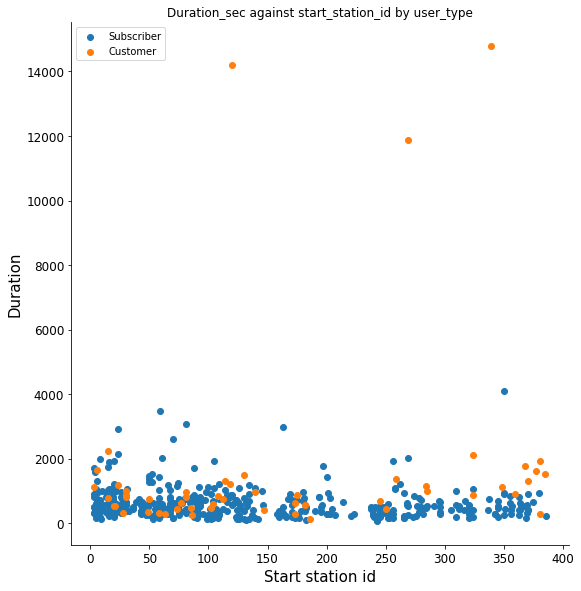

In [8]:
sample = np.random.choice(bike.shape[0], 500, replace = False);
bike_sample = bike.loc[sample]
plt.figure(figsize = [15,10]);
g = sb.FacetGrid(data = bike_sample, hue = 'user_type', size = 8);
g.map(plt.scatter,'start_station_id', 'duration_sec');
plt.legend(['Subscriber','Customer']);
plt.title('Duration_sec against start_station_id by user_type');
plt.xticks(size = 12);
plt.yticks(size = 12);
plt.xlabel('Start station id', size = 15);
plt.ylabel('Duration', size = 15);

### Start stations vs Time of the day by bike_share_for_all_trip

Start station may be having an effect on if the user shares the bike during riding period. We could also find out different times of the day when users were more likely to share.

In [10]:
# For plotting, I'll just use hours to represent the x-axis
bike['time'] = bike['start_time'].apply(lambda x:x.split(' ')[1])
bike['time'] = bike['time'].apply(lambda x:x.split(':')[0])
bike['time'] = pd.to_numeric(bike['time'])

ticks = []
labels = []
for x in range(0,24):
    ticks.append(x)

for v in ticks:
    v = str(v)
    labels.append(v)
# label.append('{}'.format(v) for v in ticks)

sample = np.random.choice(bike.shape[0], 1000, replace = False);
bike_sample = bike.loc[sample]

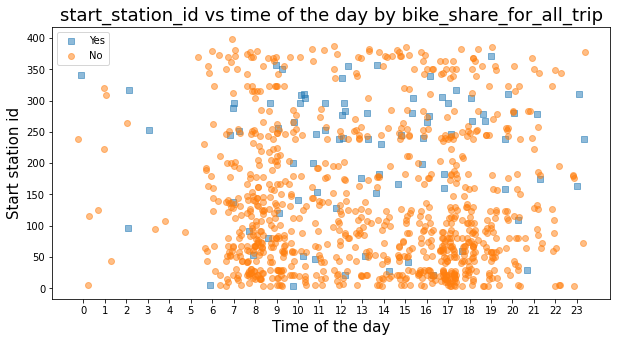

In [13]:
markers = [['Yes', 's', sb.color_palette()[0]],
          ['No', 'o', sb.color_palette()[1]]]
plt.figure(figsize = [10,5]);
for bike_share, mark, colour in markers:
    markings = bike_sample.loc[bike_sample['bike_share_for_all_trip'] == bike_share]
    sb.regplot(data = markings, x = 'time',y = 'start_station_id',x_jitter = .4, scatter_kws = {'alpha' : .5},
               marker = mark,color = colour, fit_reg = False);
plt.xticks(ticks, labels);
plt.ylabel('Start station id', size = 15);
plt.xlabel('Time of the day', size = 15);
plt.legend(['Yes','No']);
plt.title('start_station_id vs time of the day by bike_share_for_all_trip', size = 18);

### Duration against bike_id by member_gender

Bike with higher ids are preffered over those with lower ids. For longer durations(the outliers), bikes with higher higher ids were almost always being preffered. 

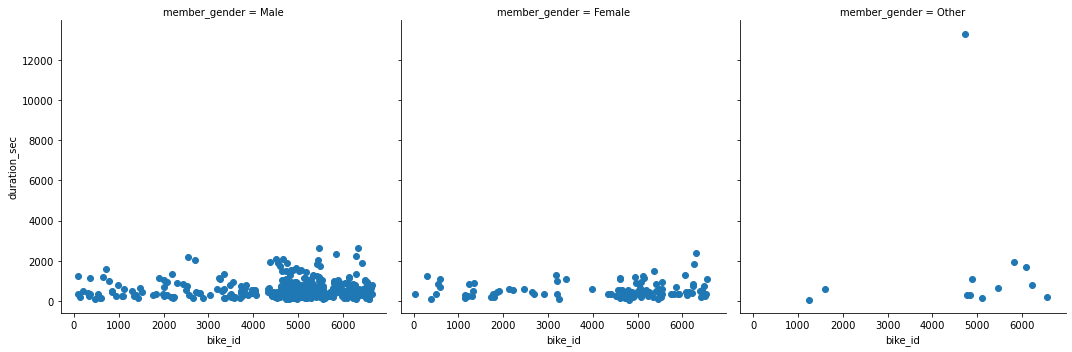

In [14]:
sample = np.random.choice(bike.shape[0], 500, replace = False);
bike_sample = bike.loc[sample]

g  = sb.FacetGrid(data = bike_sample,col = 'member_gender', margin_titles = True, size = 5);
g.map(plt.scatter, 'bike_id', 'duration_sec');



### Distribution of member birth year

Most bike riders are actually millenials(born in between 1980 and 2000). As the age group increases, the count of bike riders decreases.  

In [16]:
bikes = bike.dropna()

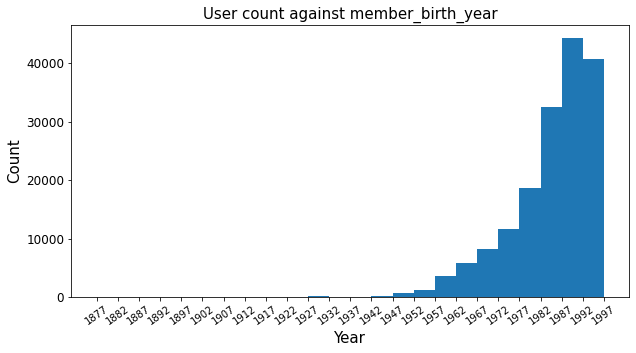

In [21]:
plt.figure(figsize = [10,5])
bins = np.arange(bikes['member_birth_year'].min() - 1, bikes['member_birth_year'].max()+ 1, 5)
plt.hist(data = bikes, x = 'member_birth_year', bins = bins);
plt.xlabel('Year', size = 15);
plt.ylabel('Count', size = 15);
plt.xticks(bins, rotation = 35);
plt.yticks(size = 12);
plt.title('User count against member_birth_year', size = 15);